Source File: https://www.kaggle.com/swathiachath/kc-housesales-data

- The test dataset had no target component which would make it difficult to find the accuracy of our model. So we considered the train.csv for the entirity of the dataset.
- Dataset had time series component. Tp remove this we considered the sales price for the months of Jan 2015 and Feb 2015.

- Data Description
- id : a notation for a house
- date: Date house was sold
- price: Price is prediction target
- bedrooms: Number of Bedrooms/House
- bathrooms: Number of bathrooms/bedrooms
- sqft_living: square footage of the home
- sqft_lot: square footage of the lot
- floorsTotal floors (levels) in house
- waterfrontHouse which has a view to a waterfront
- viewHas been viewed
- condition : How good the condition is ( Overall ). 1 indicates worn out property and 5 excellent. 
- gradeoverall grade given to the housing unit, based on King County grading system. 1 poor ,13 excellent.
- sqft_abovesquare footage of house apart from basement
- sqft_basementsquare footage of the basement
- yr_builtBuilt Year
- yr_renovatedYear when house was renovated
- zipcodezip
- latLatitude coordinate
- longLongitude coordinate
- sqft_living15Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
- sqft_lot15lotSize area in 2015(implies-- some renovations)

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [41]:
hd = pd.read_csv('kc_house_data.csv') #csv to python data frame format
hd.shape
#df = pd.read_csv('ToyotaCorolla.csv')

(2225, 21)

In [42]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 21 columns):
id               2225 non-null int64
date             2225 non-null object
price            2225 non-null float64
bedrooms         2225 non-null int64
bathrooms        2225 non-null float64
sqft_living      2107 non-null float64
sqft_lot         2225 non-null int64
floors           2225 non-null float64
waterfront       2225 non-null int64
view             2225 non-null int64
condition        2225 non-null int64
grade            2225 non-null int64
sqft_above       2225 non-null int64
sqft_basement    2225 non-null int64
yr_built         2225 non-null int64
yr_renovated     2225 non-null int64
zipcode          2225 non-null int64
lat              2225 non-null float64
long             2225 non-null float64
sqft_living15    2225 non-null int64
sqft_lot15       2225 non-null int64
dtypes: float64(6), int64(14), object(1)
memory usage: 365.2+ KB


In [43]:
hd.isnull().sum()

id                 0
date               0
price              0
bedrooms           0
bathrooms          0
sqft_living      118
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above         0
sqft_basement      0
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
dtype: int64

### Categorical/Ordinal  Variables

In [44]:
print(hd['condition'].value_counts())
print(hd['waterfront'].value_counts())
print(hd['grade'].value_counts())

3    1465
4     573
5     155
2      27
1       5
Name: condition, dtype: int64
0    2211
1      14
Name: waterfront, dtype: int64
7     956
8     613
9     240
6     229
10     99
11     36
5      31
12     17
4       2
13      1
3       1
Name: grade, dtype: int64


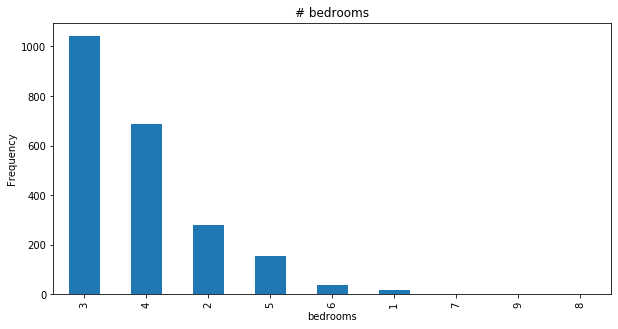

3    1044
4     687
2     280
5     154
6      38
1      18
7       2
9       1
8       1
Name: bedrooms, dtype: int64

In [45]:
ax = hd['bedrooms'].value_counts().plot(kind='bar',
                                    figsize=(10,5),
                                    title="# bedrooms")
ax.set_xlabel("bedrooms")
ax.set_ylabel("Frequency")
plt.show()
hd['bedrooms'].value_counts()

The target variable price is slightly positively skewed in the dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002782126A808>]],
      dtype=object)

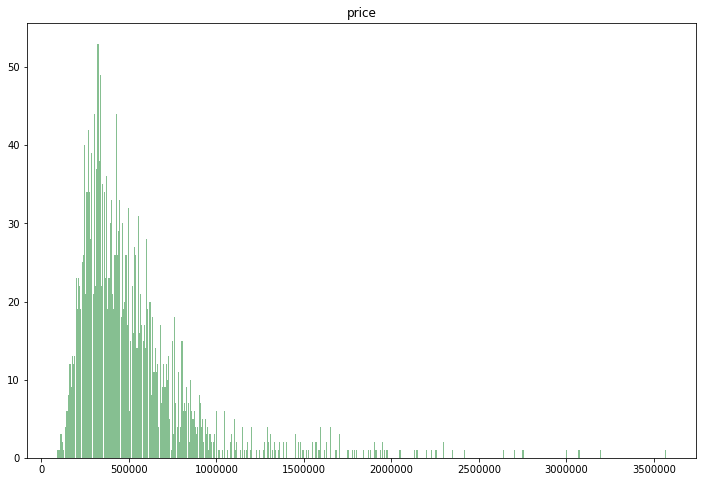

In [46]:
hd.hist(column='price', bins=500, grid=False, figsize=(12,8), color='#86bf91', zorder=3, rwidth=0.9)

### Correlation Matrix and HeatMap to remove columns that are not important

- Weak correlations: Zipcode, Yr_renovated 
- Columns sqft_living and sqft_living15 are highly correlated to each other, while the corrleation of the column sqft_living is stronger with other predictors.
- Similarly, Column sqft_lot and sqft_lot15 are highly correlated to each other, while the corrleation of the column sqft_lot is stronger with other predictors.


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.004724,-0.025710,-0.024450,-0.025910,-0.134683,0.017331,0.014070,0.043323,-0.047973,-0.006088,-0.019563,-0.017423,0.020495,-0.018727,-0.014552,-0.019468,0.018962,-0.007585,-0.133572
price,-0.004724,1.000000,0.282691,0.517018,0.684768,0.126507,0.258877,0.211229,0.429827,0.008744,0.683825,0.602530,0.277012,0.104663,0.094203,-0.062066,0.335857,0.043875,0.586721,0.110575
bedrooms,-0.025710,0.282691,1.000000,0.524898,0.575577,0.047437,0.169025,-0.019683,0.087083,0.028251,0.348931,0.482694,0.294126,0.157037,0.021101,-0.157813,-0.007756,0.129595,0.378441,0.055310
bathrooms,-0.024450,0.517018,0.524898,1.000000,0.755674,0.140563,0.500398,0.025115,0.203315,-0.118048,0.669089,0.700447,0.245914,0.519623,0.045337,-0.184291,0.018480,0.221890,0.555685,0.118668
sqft_living,-0.025910,0.684768,0.575577,0.755674,1.000000,0.216934,0.325251,0.070324,0.307025,-0.043862,0.767237,0.882913,0.395935,0.330283,0.037140,-0.198370,0.049721,0.249343,0.734102,0.214354
sqft_lot,-0.134683,0.126507,0.047437,0.140563,0.216934,1.000000,0.012603,-0.000016,0.070538,-0.001438,0.167234,0.213362,0.041815,0.063314,0.002993,-0.111582,-0.054100,0.252239,0.138207,0.708000
floors,0.017331,0.258877,0.169025,0.500398,0.325251,0.012603,1.000000,0.035332,0.036214,-0.255499,0.438674,0.506408,-0.271694,0.512300,0.016475,-0.054578,0.060478,0.108757,0.244280,-0.011815
waterfront,0.014070,0.211229,-0.019683,0.025115,0.070324,-0.000016,0.035332,1.000000,0.382779,-0.002859,0.061005,0.052441,0.048943,-0.036673,0.116916,0.033156,-0.004311,-0.043038,0.084313,0.026879
view,0.043323,0.429827,0.087083,0.203315,0.307025,0.070538,0.036214,0.382779,1.000000,0.007650,0.281801,0.188595,0.282347,-0.036322,0.094527,0.087416,0.048066,-0.069692,0.316538,0.052384
condition,-0.047973,0.008744,0.028251,-0.118048,-0.043862,-0.001438,-0.255499,-0.002859,0.007650,1.000000,-0.141894,-0.127461,0.163808,-0.316269,-0.056620,-0.032083,-0.060632,-0.030865,-0.084645,-0.001036


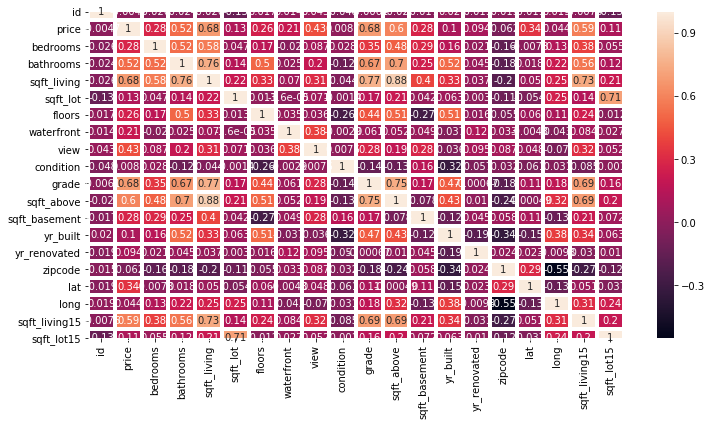

In [47]:
import seaborn as sns

hd_n = hd.drop('date', axis=1)
a= hd_n.corr()
fig=plt.figure(figsize=(12,6))
sns.heatmap(a,annot= True,linewidths=3)
a

## Preprocessing
### Step 1: Dropping columns
- date: Contains Time series data.
- Column id is the unique identifier for the records and it can be removed.
- Based on the correlation matrix, the below columns can be removed: 
sqft_living15, sqft_lot15, Zipcode, Yr_renovated

In [48]:
hd.drop(['id', 'date', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15'], axis = 1, inplace = True)

In [49]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 15 columns):
price            2225 non-null float64
bedrooms         2225 non-null int64
bathrooms        2225 non-null float64
sqft_living      2107 non-null float64
sqft_lot         2225 non-null int64
floors           2225 non-null float64
waterfront       2225 non-null int64
view             2225 non-null int64
condition        2225 non-null int64
grade            2225 non-null int64
sqft_above       2225 non-null int64
sqft_basement    2225 non-null int64
yr_built         2225 non-null int64
lat              2225 non-null float64
long             2225 non-null float64
dtypes: float64(6), int64(9)
memory usage: 260.9 KB


In [50]:
hd.isnull()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2221,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2222,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2223,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Step 2: Replacing missing values
sqft_living: It has missing values. 
- Assumption: The sqft_living depends on the number of bedrooms and bathrooms. So replacing the null values with the mean of the sqft_living group by bedrooms and bathrooms.

In [51]:
#hd['sqft_living'].groupby['bedrooms', 'bathrooms'].median()

print(hd.groupby(['bedrooms', 'bathrooms'])['sqft_living'].mean())
print(hd.groupby(['bedrooms', 'bathrooms'])['sqft_living'].median())

bedrooms  bathrooms
1         0.75          640.000000
          1.00          753.333333
          1.50          760.000000
          1.75         1020.000000
          2.00         1780.000000
                          ...     
6         5.00         3028.000000
7         3.00         2940.000000
          4.75         5370.000000
8         3.00         2850.000000
9         3.00         3680.000000
Name: sqft_living, Length: 84, dtype: float64
bedrooms  bathrooms
1         0.75          470.0
          1.00          710.0
          1.50          760.0
          1.75         1020.0
          2.00         1780.0
                        ...  
6         5.00         3028.0
7         3.00         2940.0
          4.75         5370.0
8         3.00         2850.0
9         3.00         3680.0
Name: sqft_living, Length: 84, dtype: float64


In [52]:
hd['sqft_living'] = hd.groupby(['bedrooms', 'bathrooms']).transform(lambda x: x.fillna(x.mean()))

In [53]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 15 columns):
price            2225 non-null float64
bedrooms         2225 non-null int64
bathrooms        2225 non-null float64
sqft_living      2225 non-null float64
sqft_lot         2225 non-null int64
floors           2225 non-null float64
waterfront       2225 non-null int64
view             2225 non-null int64
condition        2225 non-null int64
grade            2225 non-null int64
sqft_above       2225 non-null int64
sqft_basement    2225 non-null int64
yr_built         2225 non-null int64
lat              2225 non-null float64
long             2225 non-null float64
dtypes: float64(6), int64(9)
memory usage: 260.9 KB


### Step 3: Imputing Categorical/Ordinal variables
The dataset does not contain any categorical values. The ordinal values are good to go ahead with the dataset and model building

### Step 4: Splitting into Train and test Dataset
Using 'sklearn.model_selection.train_test_split'

In [54]:
X = hd.drop('price', axis = 1)
y = hd['price']

In [55]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

### Step 5: Scaling the dataset
Using Standard scaler to scale the dataset. The data here is slighlty right_skewed. To make the data relatively normally distributed, we are using the standard scaler.

In [56]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)

#Converting nd array to df
X_train_df = pd.DataFrame(X_train, columns = X.columns)
X_test_df = pd.DataFrame(X_test, columns = X.columns)

In [57]:
X_train_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long
0,-1.520580,-1.383859,-0.860674,-0.181086,-0.862860,-0.081477,-0.307635,-0.572483,-0.493894,-1.099887,-0.632621,-0.740745,1.190783,-0.834561
1,0.719992,-0.095039,-0.836774,-0.135147,0.059145,-0.081477,-0.307635,1.005866,-0.493894,-0.634525,-0.632621,-0.047602,-1.729879,-1.185065
2,-1.520580,-0.739449,-0.033122,-0.188246,0.981151,-0.081477,-0.307635,-0.572483,-0.493894,-0.252690,-0.632621,0.298970,1.160003,-1.017115
3,0.719992,-0.095039,-0.239263,-0.225900,-0.862860,-0.081477,-0.307635,-0.572483,-0.493894,-0.801578,1.516569,-1.572516,0.423340,-0.652007
4,0.719992,-0.417244,-0.744160,-0.120077,-0.862860,-0.081477,-0.307635,2.584216,-0.493894,0.081415,-0.632621,-0.116916,-1.135487,0.881448


In [58]:
X_train.shape

(1668, 14)

In [59]:
y_train.shape

(1668,)

## ML Models
1. Import the model
2. Instantiate the model
3. Fit the model
4. evaluate
5. fine tune the model


### 1. K Neighbors Regressor

Text(0, 0.5, 'MSE')

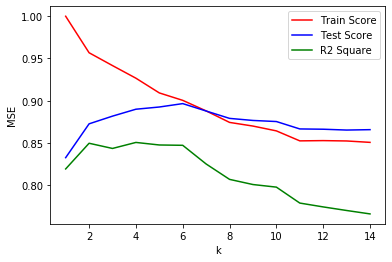

In [23]:
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

train_score_array = []
test_score_array = []
r2_score_array= [] 

for k in range(1,15):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))
    prediction=knn_reg.predict(X_test)
    r2_score_array.append(metrics.r2_score(prediction,y_test))

x_axis = range(1,15)
plt.plot(x_axis, train_score_array, c = 'r', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.plot(x_axis, r2_score_array, c = 'g', label = 'R2 Square')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

In [24]:
print(train_score_array)
print(test_score_array)
print(r2_score_array)

[1.0, 0.9568003908546151, 0.941598878863884, 0.92668000083899, 0.9092450072800581, 0.9004580873311041, 0.8879575632764909, 0.8743490569851585, 0.8700189680205433, 0.8643157551649459, 0.8525023768273018, 0.852810902932916, 0.8523833471166696, 0.8507261454798795]
[0.8326308428111926, 0.8726636442035183, 0.8817705031986233, 0.889961373259567, 0.8925787695396321, 0.8965962331686768, 0.8878275071791588, 0.8791165812579765, 0.8766631860602205, 0.8753815617855336, 0.8666185619281518, 0.8662855546295414, 0.8652989087531562, 0.8657714070022335]
[0.8192939405307347, 0.8496777242438096, 0.8435313126999717, 0.8506497992942547, 0.8476366093842378, 0.8472491874837864, 0.8251433556616028, 0.8069258715586844, 0.8008222811878964, 0.797753882544175, 0.7788940479260944, 0.774333496775526, 0.7701000862076831, 0.7660488642935691]


Based on the Knn regressor without grid search, the best k value is 5. 
- The r-square value for this is 0.8476 with train score 0.9092 and test score 0.8925

### Without Scaling

Text(0, 0.5, 'MSE')

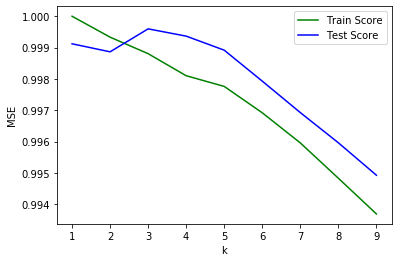

In [21]:
%matplotlib inline
train_score_array = []
test_score_array = []
#r2_score_array= [] 

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train_org, y_train)
    train_score_array.append(knn_reg.score(X_train_org, y_train))
    test_score_array.append(knn_reg.score(X_test_org, y_test))
    #prediction=knn_reg.predict(X_test)
    #r2_score_array.append(metrics.r2_score(prediction,y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

### KNN Regressor with GridSearch Cross Validation

In [22]:

knn_reg = KNeighborsRegressor()
params = {'n_neighbors':[3,4,5,6,7,8,9], 'leaf_size':[1,2,3], 'weights':['uniform', 'distance'],
          'algorithm':['auto','brute'],   'n_jobs':[-1]}

k_grid = GridSearchCV(knn_reg, param_grid=params,n_jobs=8, verbose=2)
k_grid.fit(X_train,y_train)
print("Suitable Hyper Parameters:\n",k_grid.best_params_)

prediction=k_grid.predict(X_test)
train_score=k_grid.score(X_train,y_train)
test_score=k_grid.score(X_test,y_test)

print ("training score:", train_score) 
print ("test score: ", test_score)
print("r_square:",metrics.r2_score(prediction,y_test))

C:\Users\bhumi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 84 candidates, totalling 252 fits


[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    4.6s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    7.8s
[Parallel(n_jobs=8)]: Done 252 out of 252 | elapsed:    9.6s finished


Suitable Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 3, 'weights': 'distance'}
training score: 1.0
test score:  0.8837107675360993
r_square: 0.8485836164740445


In [23]:
knn = KNeighborsRegressor(n_neighbors=5)# fit the model using the training data and training targets
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [24]:
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.9092450072800581
0.8925787695396321


## 2. Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, y_train)
prediction = lreg.predict(X_test)
train_score=lreg.score(X_train,y_train)
test_score=lreg.score(X_test,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score)
print("r_square:",metrics.r2_score(prediction,y_test))


training score: 1.0
test score:  1.0
r_square: 1.0


### Linear Regression with Grid Search

In [26]:
l_grid = LinearRegression()
params = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

l_grid1 = GridSearchCV(l_grid, param_grid=params, n_jobs=8,  verbose=2)
l_grid1.fit(X_train,y_train)

print("Best Hyper Parameters:\n",l_grid1.best_params_)
prediction=l_grid1.predict(X_test)
train_score=l_grid1.score(X_train,y_train)
test_score=l_grid1.score(X_test,y_test)

print ("training score:", train_score) 
print ("test score: ", test_score)
print("r_square:",metrics.r2_score(prediction,y_test))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Hyper Parameters:
 {'copy_X': True, 'fit_intercept': True, 'normalize': True}
training score: 1.0
test score:  1.0
r_square: 1.0


C:\Users\bhumi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 out of  24 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  24 out of  24 | elapsed:    0.0s finished


### 3. Polynomial Regression

In [27]:
from  sklearn.preprocessing  import PolynomialFeatures
train_score_list = []
test_score_list = []
r2_score_array= [] 

for n in range(1,4):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))
    prediction=lreg.predict(X_test_poly)
    r2_score_array.append(metrics.r2_score(prediction,y_test))

In [28]:
print(train_score_list)
print(test_score_list)
print(r2_score_array)

[1.0, 1.0, 1.0]
[1.0, 0.9999929499744639, 0.9999999856883988]
[1.0, 0.9999929486630488, 0.9999999856876909]


Text(0, 0.5, 'Accuracy')

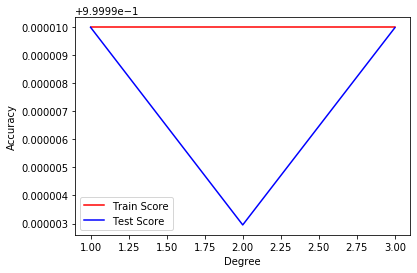

In [29]:
%matplotlib inline

x_axis = range(1,4)
plt.plot(x_axis, train_score_list, c = 'r', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')

plt.legend()
plt.xlabel('Degree')
plt.ylabel('Accuracy')


Considering the train and test scores to not be same, we consider that degree 2 is the best parameter for this model

#### Polynomial Regression with Grid Search

In [30]:
from sklearn.pipeline import make_pipeline
def PolynomialRegression(degree=2, **kwargs):
    
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

param_grid = {'polynomialfeatures__degree': np.arange(3), 
              'linearregression__fit_intercept': [True, False], 
              'linearregression__normalize': [True, False]}
poly_grid = GridSearchCV(PolynomialRegression(), param_grid,cv=10,scoring='neg_mean_squared_error',verbose=2)

poly_grid.fit(X_train, y_train)
best_parameters = poly_grid.best_params_
print(best_parameters)
prediction=poly_grid.predict(X_test)
train_score=poly_grid.score(X_train,y_train)
test_score=poly_grid.score(X_test,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score)
from sklearn import metrics
print("r_square:",metrics.r2_score(prediction,y_test))

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0, total=   0.0s
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0, total=   0.0s
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0, total=   0.0s
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0, total=   0.0s
[CV] linearregression

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=2 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=2, total=   0.0s
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=2 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=2, total=   0.0s
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=2 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=2, total=   0.0s
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=2 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=2, total=   0.0s
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polyno

[CV]  linearregression__fit_intercept=False, linearregression__normalize=True, polynomialfeatures__degree=1, total=   0.0s
[CV] linearregression__fit_intercept=False, linearregression__normalize=True, polynomialfeatures__degree=1 
[CV]  linearregression__fit_intercept=False, linearregression__normalize=True, polynomialfeatures__degree=1, total=   0.0s
[CV] linearregression__fit_intercept=False, linearregression__normalize=True, polynomialfeatures__degree=1 
[CV]  linearregression__fit_intercept=False, linearregression__normalize=True, polynomialfeatures__degree=1, total=   0.0s
[CV] linearregression__fit_intercept=False, linearregression__normalize=True, polynomialfeatures__degree=1 
[CV]  linearregression__fit_intercept=False, linearregression__normalize=True, polynomialfeatures__degree=1, total=   0.0s
[CV] linearregression__fit_intercept=False, linearregression__normalize=True, polynomialfeatures__degree=1 
[CV]  linearregression__fit_intercept=False, linearregression__normalize=Tru

[CV]  linearregression__fit_intercept=False, linearregression__normalize=False, polynomialfeatures__degree=2, total=   0.0s
[CV] linearregression__fit_intercept=False, linearregression__normalize=False, polynomialfeatures__degree=2 
[CV]  linearregression__fit_intercept=False, linearregression__normalize=False, polynomialfeatures__degree=2, total=   0.0s
[CV] linearregression__fit_intercept=False, linearregression__normalize=False, polynomialfeatures__degree=2 
[CV]  linearregression__fit_intercept=False, linearregression__normalize=False, polynomialfeatures__degree=2, total=   0.0s
{'linearregression__fit_intercept': True, 'linearregression__normalize': True, 'polynomialfeatures__degree': 1}
training score: -8.826408311041034e-20
test score:  -8.401137373620075e-20
r_square: 1.0


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.9s finished
C:\Users\bhumi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Polynomial Regression with GridSearchCV shows that the best paramter for degree is 1 as shown above. 

### 3. Ridge

In [31]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []
r2_score_array = []

for alpha in x_range: 
    ridge = Ridge(alpha) 
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))
    prediction=ridge.predict(X_test)
    r2_score_array.append(metrics.r2_score(prediction,y_test))
    
print(train_score_list)
print(test_score_list)
print(r2_score_array)

[0.9999999998868584, 0.9999999886914491, 0.9999988747361954, 0.9998928238076865, 0.9929406845252264]
[0.999999999891429, 0.9999999891482119, 0.9999989201220852, 0.999897085083118, 0.9931817682647536]
[0.9999999998914275, 0.9999999891468464, 0.9999989187652252, 0.9998958098427071, 0.9924275394959763]


Text(0.5, 0, '$\\alpha$')

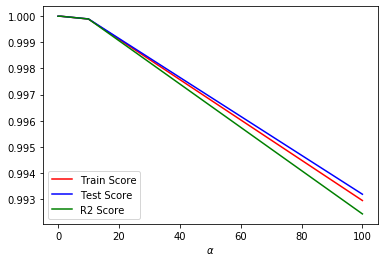

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'r', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.plot(x_range, r2_score_array, c = 'g', label = 'R2 Score')
#plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

The Ridge regression without GridSearch shows mostly the overfitting of the data. The train score here is less than the test score. While the R-SQuare value is good with every value of alpha.

#### Ridge with GridSearchCV

In [33]:
ridge = Ridge(random_state=0, max_iter=1000000)
a_range = [150, 175, 200, 225, 250, 275, 300]
tune_param = [{'alpha': a_range}]
ridge1 = GridSearchCV(ridge, tune_param, cv=10, n_jobs=8, verbose=2)
ridge1.fit(X_train, y_train)
print("Best Hyper Parameters:\n",ridge1.best_params_)
prediction=ridge1.predict(X_test)
train_score=ridge1.score(X_train,y_train)
test_score=ridge1.score(X_test,y_test)
prediction=ridge1.predict(X_test)


print ("training score:", train_score) 
print ("test score: ", test_score)
print("r2:",metrics.r2_score(y_test,prediction))

Fitting 10 folds for each of 7 candidates, totalling 70 fits
Best Hyper Parameters:
 {'alpha': 150}
training score: 0.9868719302719785
test score:  0.9872820146184441
r2: 0.9872820146184441


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  70 out of  70 | elapsed:    0.1s finished


Ridge with GridSearch too shows higher test score than the train score.

### 4. Lasso

In [34]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100, 1000, 10000]
train_score_list = []
test_score_list = []
r2_score_array = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))
    prediction=lasso.predict(X_test)
    r2_score_array.append(metrics.r2_score(prediction,y_test))
    
print(train_score_list)
print(test_score_list)
print(r2_score_array)

[0.9999999800511847, 0.9999999804032993, 0.9999999836529717, 0.9999999992760404, 0.9999999107452332, 0.9999910745233197, 0.9991074523319714]
[0.9999999839384249, 0.9999999841911624, 0.9999999865181869, 0.9999999993263111, 0.9999999103610043, 0.9999910361004278, 0.9991036100427847]
[0.9999999839369502, 0.9999999841897036, 0.9999999865168815, 0.9999999993262825, 0.99999991030742, 0.9999909822991856, 0.9990475502558074]


Text(0.5, 0, '$\\alpha$')

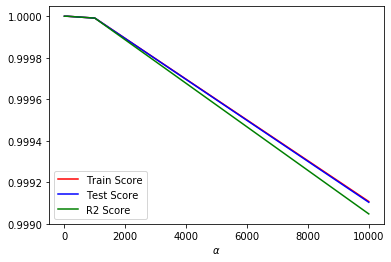

In [35]:
plt.plot(x_range, train_score_list, c = 'r', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.plot(x_range, r2_score_array, c = 'g', label = 'R2 Score')

#plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

#### Lasso with GridSearch

In [36]:

lasso = Lasso(random_state=0, max_iter=1000000)

tune_param = [{'alpha': [0.001,0.01,0.1,10,100, 1000, 10000]}]
lgrid = GridSearchCV(lasso, tune_param, cv=10, n_jobs=8, verbose=2)
lgrid.fit(X_train, y_train)
train_score=lgrid.score(X_train,y_train)
test_score=lgrid.score(X_test,y_test)
print("Suitable Hyper Parameter Value of alpha:\n",lgrid.best_params_)
prediction=lgrid.predict(X_test)
print ("training score:", train_score) 
print ("test score: ", test_score)
from sklearn import metrics
print("r2:",metrics.r2_score(y_test,prediction))

print(lgrid.best_score_)
print(lgrid.best_estimator_.alpha)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
Suitable Hyper Parameter Value of alpha:
 {'alpha': 10}
training score: 0.9999999992760404
test score:  0.9999999993263111
r2: 0.999999999326311
0.9999999989264385
10


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  70 out of  70 | elapsed:    0.1s finished


Through both the lasso and with gridsearch, we found that the best value for alpha is 10 where the train, test and R2 scores are most suitable.

### 5. Support Vector Machine

In [37]:
from sklearn.svm import SVR
model1=SVR(kernel='linear',degree=1, gamma='scale', C=100, epsilon=0.2)
model1.fit(X_train,y_train)

prediction=model1.predict(X_test)
train_score=model1.score(X_train,y_train)
test_score=model1.score(X_test,y_test)

print ("training score:", train_score) 
print ("test score: ", test_score)
print("r2:",metrics.r2_score(y_test,prediction))

training score: 0.7195604321493012
test score:  0.7107412878049073
r2: 0.7107412878049073


Conclusion:
- The best machine learning model for this dataset is linear regression with perfect train and test score, however considering all the scenarios model which works the best is the ridge with aplha value 150.  

## Part 2 of the project

Apply any two models with bagging and any two models with pasting.

### Applying bagging on KNN

The best value for KNN was n = 5. Applying the bagging, the score decreases avoiding the overfitting of the model. The training and the test score for the below n_estimators gives the best stable results.

In [50]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(5)
#dt_clf = DecisionTreeClassifier(random_state=0)
bag_reg = BaggingRegressor(knn_reg, n_estimators= 500, max_samples=200, random_state=0, bootstrap=True, oob_score=True)

bag_reg.fit(X_train, y_train)
y_pred = bag_reg.predict(X_test)

train_score=bag_reg.score(X_train,y_train)
test_score=bag_reg.score(X_test,y_test)

In [51]:
print ("training score:", train_score) 
print ("test score: ", test_score)
#print("r_square:",metrics.r2_score(prediction,y_test))

training score: 0.7748957165463121
test score:  0.7797288160295333


Text(0, 0.5, 'MSE')

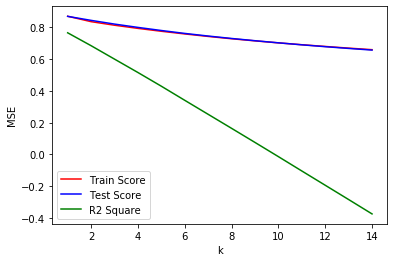

In [53]:
train_score_array = []
test_score_array = []
r2_score_array= [] 

for k in range(1,15):
    knn_reg = KNeighborsRegressor(k)
    bag_reg = BaggingRegressor(knn_reg, n_estimators= 500, max_samples=200, random_state=0, bootstrap=True, oob_score=True)
    bag_reg.fit(X_train, y_train)
    train_score_array.append(bag_reg.score(X_train, y_train))
    test_score_array.append(bag_reg.score(X_test, y_test))
    prediction=bag_reg.predict(X_test)
    r2_score_array.append(metrics.r2_score(prediction,y_test))

x_axis = range(1,15)
plt.plot(x_axis, train_score_array, c = 'r', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.plot(x_axis, r2_score_array, c = 'g', label = 'R2 Square')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

### Ridge Regression with Bagging
In ridge regression, as alpha increased, the train and test score didn't drop below .9 for alpha 100.
With bagging, making the model morerobust and stable the range of train and test score reached to 0.89 as lowest with alpha 100.
The best hyperparameter value for ridge with bagging is alpha = 10.

In [72]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []
r2_score_array = []

for alpha in x_range: 
    ridge = Ridge(alpha) 
    bag_r = BaggingRegressor(ridge, n_estimators= 1000, max_samples=200, random_state=0, bootstrap=True,  oob_score=True)
    bag_r.fit(X_train,y_train)
    train_score_list.append(bag_r.score(X_train,y_train))
    test_score_list.append(bag_r.score(X_test, y_test))
    prediction=bag_r.predict(X_test)
    r2_score_array.append(metrics.r2_score(prediction,y_test))
    
print(train_score_list)
print(test_score_list)
print(r2_score_array)


[0.9999999877149912, 0.9999987783088294, 0.9998843036469921, 0.9926621465159926, 0.8902430657375395]
[0.99999998820853, 0.9999988273066932, 0.9998888659521709, 0.9929066479884525, 0.8904619927600579]
[0.9999999882068592, 0.9999988256479485, 0.999887320685101, 0.9920478458276263, 0.80478309559753]


Text(0.5, 0, '$\\alpha$')

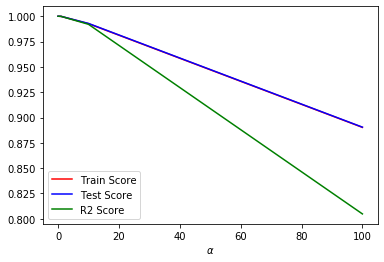

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'r', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.plot(x_range, r2_score_array, c = 'g', label = 'R2 Score')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

### Pasting with Lasso Regression
No more difference on applying pasting on the base model

In [83]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100, 1000, 10000]
train_score_list = []
test_score_list = []
r2_score_array = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    pst_l = BaggingRegressor(lasso, n_estimators= 1000, max_samples=500, random_state=0, bootstrap=False)
    pst_l.fit(X_train,y_train)
    train_score_list.append(pst_l.score(X_train,y_train))
    test_score_list.append(pst_l.score(X_test, y_test))
    prediction=pst_l.predict(X_test)
    r2_score_array.append(metrics.r2_score(prediction,y_test))
    
print(train_score_list)
print(test_score_list)
print(r2_score_array)

[0.999999981335805, 0.9999999816739967, 0.9999999845707169, 0.9999999976279341, 0.9999999061420325, 0.9999906142032537, 0.9990614203253704]
[0.999999984936242, 0.9999999851746924, 0.9999999871892014, 0.9999999976529214, 0.9999999056793515, 0.9999905679351538, 0.9990567935153747]
[0.9999999849347213, 0.9999999851731908, 0.9999999871878478, 0.9999999976527141, 0.9999999056215332, 0.9999905098766956, 0.9989962331791061]


Text(0.5, 0, '$\\alpha$')

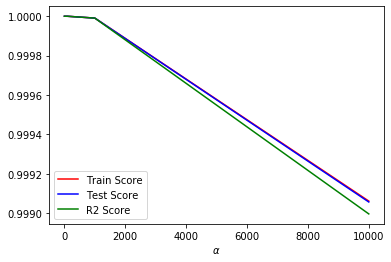

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'r', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.plot(x_range, r2_score_array, c = 'g', label = 'R2 Score')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

### Pasting on the Ridge Regression
Ridge with pasting ensemble method gives the better model than one with bootstrapping.The r-square value is improved removing the biased feature of the dataset.

In [86]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []
r2_score_array = []

for alpha in x_range: 
    ridge = Ridge(alpha) 
    pst_r = BaggingRegressor(ridge, n_estimators= 1000, max_samples=500, random_state=0, bootstrap=False )
    pst_r.fit(X_train,y_train)
    train_score_list.append(pst_r.score(X_train,y_train))
    test_score_list.append(pst_r.score(X_test, y_test))
    prediction=pst_r.predict(X_test)
    r2_score_array.append(metrics.r2_score(prediction,y_test))
    
print(train_score_list)
print(test_score_list)
print(r2_score_array)

[0.999999998547044, 0.999999854970633, 0.9999857588839139, 0.998799747149717, 0.9598569065280123]
[0.9999999986056655, 0.999999860818836, 0.9999863300125778, 0.9988452879532878, 0.9606917740395496]
[0.9999999986056011, 0.9999998607545619, 0.9999862672270223, 0.998794851883419, 0.9476942623960868]


Text(0.5, 0, '$\\alpha$')

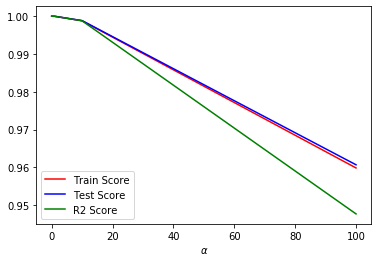

In [87]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'r', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.plot(x_range, r2_score_array, c = 'g', label = 'R2 Score')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

### Linear SVR with adaboost boosting

Linear SVR with adaboosting gives the model with a good accuracy of 0.997 for both train and test data.

In [93]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
svr = SVR(kernel='linear',degree=1, gamma='scale', C=100, epsilon=0.2)
adb_reg = AdaBoostRegressor(svr,  n_estimators=200,  learning_rate=0.5, random_state=0)
adb_reg.fit(X_train, y_train)


AdaBoostRegressor(base_estimator=SVR(C=100, cache_size=200, coef0=0.0, degree=1,
                                     epsilon=0.2, gamma='scale',
                                     kernel='linear', max_iter=-1,
                                     shrinking=True, tol=0.001, verbose=False),
                  learning_rate=0.5, loss='linear', n_estimators=200,
                  random_state=0)

In [94]:
print("Accuracy on training set: {:.3f}".format(adb_reg.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(adb_reg.score(X_test, y_test)))

Accuracy on training set: 0.997
Accuracy on test set: 0.997


### Ridge with alpha value with adaboosting having alpha value 100 

Here, the ridge with comaparatively lower train score was applied adaboost boosting method to improve the model.
Result: The model performed better than just the ridge regression

In [97]:
ridge = Ridge(100) 
adb_rid = AdaBoostRegressor(ridge,  n_estimators=200,  learning_rate=0.5, random_state=0)
adb_rid.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=Ridge(alpha=100, copy_X=True,
                                       fit_intercept=True, max_iter=None,
                                       normalize=False, random_state=None,
                                       solver='auto', tol=0.001),
                  learning_rate=0.5, loss='linear', n_estimators=200,
                  random_state=0)

In [98]:
print("Accuracy on training set: {:.6f}".format(adb_rid.score(X_train, y_train)))
print("Accuracy on test set: {:.6f}".format(adb_rid.score(X_test, y_test)))

Accuracy on training set: 0.998760
Accuracy on test set: 0.998792


### GradientBoosting

In [129]:
from  sklearn.ensemble import GradientBoostingRegressor
params = { 'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 1, 'loss': 'lad'}

gbrt = GradientBoostingRegressor(**params)
gbrt.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=1, loss='lad', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [130]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, gbrt.predict(X_test))
print("MSE: %.4f" % mse)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

MSE: 338676909006.4003
Accuracy on training set: -1.602
Accuracy on test set: -1.455


### Applying PCA on the dataset

In [190]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

In [191]:
X2D[:5]

array([[3053239.57458154,  -59351.2824651 ],
       [2683347.23404053,  -49982.22514003],
       [2553264.27155259,  -53526.26802328],
       [2483393.67823871,  -45688.24483124],
       [2233469.69911522,  -39258.97627698]])

In [192]:
X3D_inv = pca.inverse_transform(X2D)

In [193]:
np.allclose(X3D_inv, X)

False

PCA Feature exploration

In [194]:
pca.components_

array([[ 7.36856545e-07,  1.17671974e-06,  9.99840174e-01,
         1.78136650e-02,  4.10507191e-07,  4.84690378e-08,
         9.74304486e-07,  1.62936903e-08,  2.34377968e-06,
         1.47608485e-03,  3.48897391e-04,  8.71667820e-06,
         1.41439375e-07,  1.77927215e-08],
       [ 2.10976228e-07,  1.23721382e-06, -1.78172596e-02,
         9.99838270e-01, -2.42197951e-07, -4.60175221e-08,
         2.52059750e-07, -3.52728454e-08,  1.99341839e-06,
         2.44429565e-03,  5.64208933e-05,  3.04966553e-05,
        -3.01994658e-07,  7.25604437e-07]])

The PCA 2 components explains the maximum variance in dimension 1 of about 98% while the remaining is expalined by d2 1.84%

In [195]:
pca.explained_variance_ratio_

array([0.98156247, 0.01843245])

The Reconstruction error is negligible or way too small which is better for the model

In [196]:
1 - pca.explained_variance_ratio_.sum()

5.079688635167834e-06

Considering expalined variance threshold to be 95%

In [197]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [198]:
d

1

In [206]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
X_reduced_test = pca.fit_transform(X_test)

In [207]:
X_reduced_test.shape

(557, 10)

In [205]:
X_reduced.shape

(557, 10)

In [200]:
pca.n_components_

10

In [201]:
np.sum(pca.explained_variance_ratio_)

0.9782403666309931

In [202]:
pca = PCA(n_components = 10)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [203]:
X_reduced_pca = X_reduced

Incremental PCA

In [214]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100

inc_pca = IncrementalPCA(n_components=10)
for X_batch in np.array_split(X_train, n_batches):
    print(".", end="")
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)


....................................................................................................

In [218]:
from sklearn.decomposition import IncrementalPCA

n_batches = 10

inc_pca = IncrementalPCA(n_components=10)
for X_batch in np.array_split(X_test, n_batches):
    print(".", end="")
    inc_pca.partial_fit(X_batch)

X_reduced_test = inc_pca.transform(X_test)

..........

In [149]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

In [150]:
X_reduced_inc_pca = X_reduced

In [151]:
np.allclose(pca.mean_, inc_pca.mean_)

True

Difference between iPCA and PCA is significant where in incremental we are losing quite of the data than PCA

In [152]:
np.allclose(X_reduced_pca, X_reduced_inc_pca)

False

In [219]:
X_reduced.shape

(1668, 10)

In [220]:
X_reduced_test.shape

(557, 10)

### Applying all the project 1 models with PCA reduced data

In [221]:
X_train_pca = X_reduced
X_test_pca = X_reduced_test

In [222]:
X_train_pca.shape

(1668, 10)

In [223]:
y_train.shape

(1668,)

#### 1. K Neighbors Regressor

Text(0, 0.5, 'MSE')

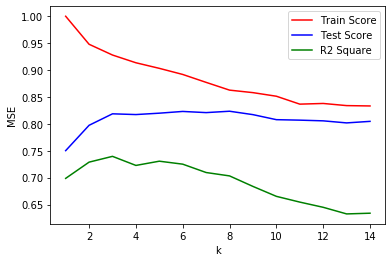

In [227]:
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

train_score_array = []
test_score_array = []
r2_score_array= [] 

for k in range(1,15):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train_pca, y_train)
    train_score_array.append(knn_reg.score(X_train_pca, y_train))
    test_score_array.append(knn_reg.score(X_test_pca, y_test))
    prediction=knn_reg.predict(X_test_pca)
    r2_score_array.append(metrics.r2_score(prediction,y_test))

x_axis = range(1,15)
plt.plot(x_axis, train_score_array, c = 'r', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.plot(x_axis, r2_score_array, c = 'g', label = 'R2 Square')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

In [228]:
print(train_score_array)
print(test_score_array)
print(r2_score_array)

[1.0, 0.947906830221062, 0.9278984149855721, 0.9135284500270058, 0.9031478532001661, 0.8917955022410544, 0.8770710443461027, 0.8626473285922641, 0.8579907090299763, 0.8513102944233603, 0.8366091026441218, 0.8378722136613356, 0.833882430060137, 0.8332383885747909]
[0.7501735180261584, 0.7972861702405398, 0.8186146156497811, 0.8172345544450921, 0.819809055771787, 0.8230393970023736, 0.8208665643915658, 0.8234226641437958, 0.8170881900310708, 0.8077403951474641, 0.8068496929045205, 0.8055614424501079, 0.801728119282467, 0.8045957348012438]
[0.6986227971238623, 0.7287957284309934, 0.739554687908409, 0.7226841729336262, 0.7305561543424453, 0.7250256228627321, 0.70948784653284, 0.7032000895661903, 0.6836491091432626, 0.6651961930029975, 0.6545179391911162, 0.6448330282602841, 0.6325456235072188, 0.6338676375515695]


#### Conclusion: For K= 5, which is the best k value:

#####  With PCA:
- train score: 0.9031
- test score: 0.8198
- r-Square: 0.7305

##### Without PCA:
- train score: 0.9092
- test score: 0.8925
- r-Square: 0.8476
- The model with PCA performed worse than without PCA

#### Linear Regression with PCA
In linear Regression too, PCA made the model perform worse

In [229]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train_pca, y_train)
prediction = lreg.predict(X_test_pca)
train_score=lreg.score(X_train_pca,y_train)
test_score=lreg.score(X_test_pca,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score)
print("r_square:",metrics.r2_score(prediction,y_test))

training score: 0.8852192327754125
test score:  0.8500939048208032
r_square: 0.8062011059507227


#### Linear Regression with Grid Search

PCA degraded the model performance.
This occurs because the new features space are linear combination from original features. Therefore, may there is loss of information. However, if the regression pressuposts are satisfied using PCA and not in original data, it is recomendate using PCA.

In [230]:
from sklearn.model_selection import GridSearchCV

l_grid = LinearRegression()
params = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

l_grid1 = GridSearchCV(l_grid, param_grid=params, n_jobs=8,  verbose=2)
l_grid1.fit(X_train_pca,y_train)

print("Best Hyper Parameters:\n",l_grid1.best_params_)
prediction=l_grid1.predict(X_test_pca)
train_score=l_grid1.score(X_train_pca,y_train)
test_score=l_grid1.score(X_test_pca,y_test)

print ("training score:", train_score) 
print ("test score: ", test_score)
print("r_square:",metrics.r2_score(prediction,y_test))

C:\Users\bhumi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Hyper Parameters:
 {'copy_X': True, 'fit_intercept': True, 'normalize': True}
training score: 0.8852192327754125
test score:  0.850093904820803
r_square: 0.8062011059507231


[Parallel(n_jobs=8)]: Done  22 out of  24 | elapsed:    5.5s remaining:    0.4s
[Parallel(n_jobs=8)]: Done  24 out of  24 | elapsed:    5.5s finished


#### Polynomial Regression with PCA

With degree 2 polynomial regression the model score is better. It does not overfit the data as such in model without PCA. Polynomial regression with PCA performed better for degree two. It did not overfit.


In [231]:
from  sklearn.preprocessing  import PolynomialFeatures
train_score_list = []
test_score_list = []
r2_score_array= [] 

for n in range(1,4):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train_pca)
    X_test_poly = poly.transform(X_test_pca)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))
    prediction=lreg.predict(X_test_poly)
    r2_score_array.append(metrics.r2_score(prediction,y_test))

In [232]:

print ("training score:", train_score_list) 
print ("test score: ", test_score_list)
print("r_square:",r2_score_array)

training score: [0.8852192327754125, 0.983086158234558, 0.9912368092085806]
test score:  [0.8500939048208034, -9.111706971071943, -566.981852529331]
r_square: [0.8062011059507231, 0.21183081588831687, -0.013505986298725237]


Text(0, 0.5, 'Accuracy')

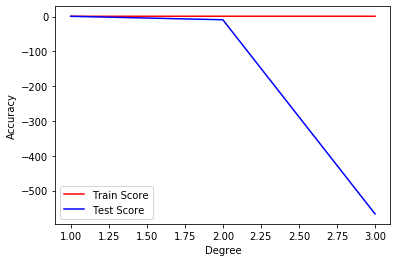

In [233]:
%matplotlib inline

x_axis = range(1,4)
plt.plot(x_axis, train_score_list, c = 'r', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')

plt.legend()
plt.xlabel('Degree')
plt.ylabel('Accuracy')

#### Ridge with PCA
With PCA, the model did not perform fair. The scores drastically dropped. 

In [234]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []
r2_score_array = []

for alpha in x_range: 
    ridge = Ridge(alpha) 
    ridge.fit(X_train_pca,y_train)
    train_score_list.append(ridge.score(X_train_pca,y_train))
    test_score_list.append(ridge.score(X_test_pca, y_test))
    prediction=ridge.predict(X_test_pca)
    r2_score_array.append(metrics.r2_score(prediction,y_test))
    
print(train_score_list)
print(test_score_list)
print(r2_score_array)

[0.8852192327609525, 0.8852192313296504, 0.8852190884161387, 0.8852050105288342, 0.8839824712931307]
[0.8500938468725496, 0.8500933243018617, 0.8500879961577695, 0.8500246350678892, 0.848525306405815]
[0.8061998786217032, 0.806188831484484, 0.8060782437933685, 0.8049608423897191, 0.7927284445147752]


Text(0.5, 0, '$\\alpha$')

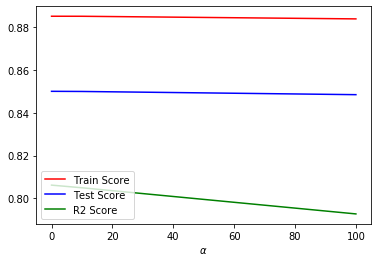

In [235]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'r', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.plot(x_range, r2_score_array, c = 'g', label = 'R2 Score')
#plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

#### Lasso with PCA

In [236]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100, 1000, 10000]
train_score_list = []
test_score_list = []
r2_score_array = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train_pca,y_train)
    train_score_list.append(lasso.score(X_train_pca,y_train))
    test_score_list.append(lasso.score(X_test_pca, y_test))
    prediction=lasso.predict(X_test_pca)
    r2_score_array.append(metrics.r2_score(prediction,y_test))
    
print(train_score_list)
print(test_score_list)
print(r2_score_array)

[0.8852192327754023, 0.8852192327744081, 0.8852192326750884, 0.8852192227440286, 0.8852182296470286, 0.8851297780232472, 0.8764925499509463]
[0.8500939005468184, 0.8500938621983252, 0.8500934775463516, 0.8500896235223161, 0.8500503328520568, 0.8496718808619315, 0.8398333116154985]
[0.8062010774740844, 0.8062008212980212, 0.8061982583824983, 0.8061726183999945, 0.8059151348427748, 0.8033487619462778, 0.7676726750266459]


Text(0.5, 0, '$\\alpha$')

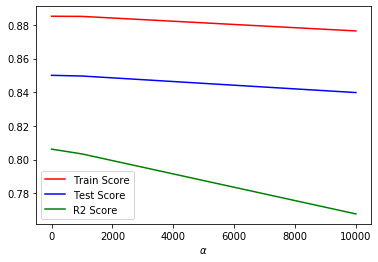

In [237]:
plt.plot(x_range, train_score_list, c = 'r', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.plot(x_range, r2_score_array, c = 'g', label = 'R2 Score')

#plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

#### SVM with PCA:

In [238]:
from sklearn.svm import SVR
model1=SVR(kernel='linear',degree=1, gamma='scale', C=100, epsilon=0.2)
model1.fit(X_train_pca,y_train)

prediction=model1.predict(X_test_pca)
train_score=model1.score(X_train_pca,y_train)
test_score=model1.score(X_test_pca,y_test)

print ("training score:", train_score) 
print ("test score: ", test_score)
print("r2:",metrics.r2_score(y_test,prediction))

training score: 0.6812982968386266
test score:  0.6231377461563399
r2: 0.6231377461563399


##### Conclusion: With PCA the model did not perform better. PCA did not help in getting better results in regression models.

### Deep Learning Models

In [60]:
from keras.models import Sequential
from keras.layers import Dense



#### 1. Define model

In [83]:
# create model
model = Sequential()
model.add(Dense(13, input_dim=14, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='relu'))

#### 2. Compile model

In [84]:
# Compile model
model.compile(loss='mse', optimizer='sgd' , metrics = ['mse'])

#### 3. Fit model

In [85]:
model.fit(X_train, y_train, epochs = 100, batch_size = 20)

Epoch 1/100
1668/1668 [==============================] - 0s 57us/step - loss: 12092514676902266880.0000 - mse: 12092514644187414528.0000
Epoch 2/100
1668/1668 [==============================] - 0s 64us/step - loss: 372227204466.8010 - mse: 372227276800.0000
Epoch 3/100
1668/1668 [==============================] - 0s 40us/step - loss: 372227206981.3717 - mse: 372227211264.0000
Epoch 4/100
1668/1668 [==============================] - 0s 75us/step - loss: 372227205724.0864 - mse: 372227276800.0000
Epoch 5/100
1668/1668 [==============================] - 0s 59us/step - loss: 372227205841.9568 - mse: 372227145728.0000
Epoch 6/100
1668/1668 [==============================] - 0s 66us/step - loss: 372227202227.2614 - mse: 372227276800.0000
Epoch 7/100
1668/1668 [==============================] - 0s 67us/step - loss: 372227206667.0504 - mse: 372227145728.0000
Epoch 8/100
1668/1668 [==============================] - 0s 44us/step - loss: 372227210438.9065 - mse: 372227211264.0000
Epoch 9/100
1668

1668/1668 [==============================] - 0s 51us/step - loss: 372227208277.9473 - mse: 372227276800.0000
Epoch 69/100
1668/1668 [==============================] - 0s 48us/step - loss: 372227202070.1007 - mse: 372227211264.0000
Epoch 70/100
1668/1668 [==============================] - 0s 43us/step - loss: 372227205331.1847 - mse: 372227211264.0000
Epoch 71/100
1668/1668 [==============================] - 0s 48us/step - loss: 372227204388.2206 - mse: 372227276800.0000
Epoch 72/100
1668/1668 [==============================] - 0s 45us/step - loss: 372227204702.5420 - mse: 372227145728.0000
Epoch 73/100
1668/1668 [==============================] - 0s 52us/step - loss: 372227208828.0096 - mse: 372227112960.0000
Epoch 74/100
1668/1668 [==============================] - 0s 60us/step - loss: 372227206038.4077 - mse: 372227211264.0000
Epoch 75/100
1668/1668 [==============================] - 0s 60us/step - loss: 372227207727.8849 - mse: 372227211264.0000
Epoch 76/100
1668/1668 [=============

#### 4. Evaluate model

In [86]:
model.evaluate(X_test, y_test)

557/557 [==============================] - 0s 32us/step


[423597320776.6176, 423597309952.0]

In [87]:
from sklearn.metrics import r2_score, recall_score, precision_score

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

print('Train score: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test score: {:.2f}'.format(r2_score(y_test, y_test_predict)))

Train score: -2.32
Test score: -2.07


#### Grid Search

In [88]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [93]:
def create_model():
    #create model
    model = Sequential()
    model.add(Dense(12, input_dim=14, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    #compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [99]:
seed = 10
np.random.seed(10)

In [95]:
model = KerasClassifier(build_fn = create_model, verbose = 0)

param_grid = {'batch_size':[10,20,30,40] , 'epochs':[10, 50, 100]}
grid_search = GridSearchCV(estimator= model, param_grid = param_grid, cv = 5)

In [96]:
grid_search_result = grid_search.fit(X, y)

In [100]:
from sklearn.metrics import r2_score, recall_score, precision_score

y_train_predict = grid_search_result.predict(X_train)
y_test_predict = grid_search_result.predict(X_test)

print('Train score: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test score: {:.2f}'.format(r2_score(y_test, y_test_predict)))

Train score: -1.51
Test score: -1.37


In [101]:
print("Best Hyper Parameters:\n",grid_search_result.best_params_)

Best Hyper Parameters:
 {'batch_size': 10, 'epochs': 10}


#### Best parameters for modeling the neural networks on this dataset is with epoch 10 and batch size 10